# Purpose of the analysis

This study aims to evaluate the impact of various factors on an individual's risk of developing coronary heart disease (CHD) within the next decade. To achieve this goal, it is necessary to conduct statistical analysis on individual health data related to CHD. This dataset covers multiple aspects, including personal basic information, living habits, health status, and medical test indicators. Through in - depth analysis of this data, we can identify key factors closely associated with the risk of CHD onset.

The results of this study can be used to build a CHD risk prediction model. This model will assist medical institutions and healthcare providers in assessing the likelihood of an individual developing CHD in the future. Data analysis will help healthcare providers make more informed decisions when formulating preventive measures, diagnostic plans, and treatment strategies. For individuals, based on their personal risk assessment results, they can take targeted preventive actions, such as adjusting their lifestyle and enhancing health management, to reduce their risk of developing CHD.

# The short plan

* Import data
* Make a brief preliminary overview of the data
* If necessary, pre-process and clean each field.
* Check the final data set for duplicates and omissions, and evaluate its suitability for the study.
* Conduct a research analysis of the data and formulate conclusions
* Based on the findings from the data analysis, formulate a set of recommendations to the medical research

# A brief overview of the data

In [30]:
# Importing library modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# Reading the source data from the CSV file into the Data Frame df
df = pd.read_csv('framingham.csv')

# We display the first ten lines for visual verification of the correctness of downloads.
display(df.head(10)) #tail()

# Displaying information about the Data frame
print(df.info())

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB
None


# Data preprocessing

In [31]:
# Initial amount of data
data_len_start=df.shape[0]
print("Rows in the original set:",data_len_start)

Rows in the original set: 4238


After checking the data in the data table, we confirmed that each column contains a single format, with no obvious or hidden duplicates, and no incorrect entries. Therefore, this step is skipped.

## Gender

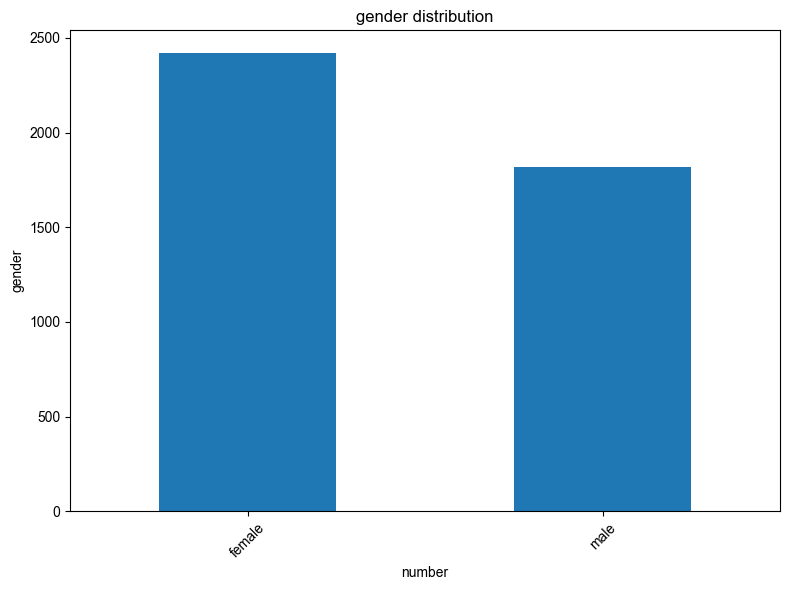

In [32]:
# set font
plt.rcParams["font.family"] = ["Arial", "SimHei"]
# Replace 0 in the male column with female, and 1 with male
df['male'] = df['male'].map({0: 'female', 1:'male'})

# Plot the number distribution of the male column
value_counts_male = df['male'].value_counts()
plt.figure(figsize=(8, 6))
value_counts_male.plot(kind='bar')
plt.ylabel('gender')
plt.xlabel('number')
plt.xticks(rotation=45)
plt.title('gender distribution')
plt.tight_layout()
plt.show()

# The distribution corresponds to the expected.
# No anomalies detected

## Age

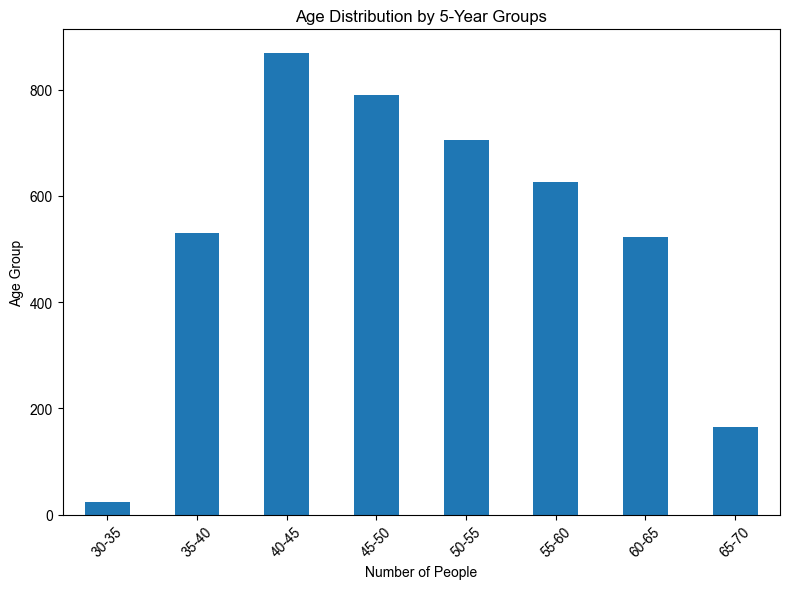

In [33]:
# Plot the age distribution
bins = range(30, 71, 5)  # 30-35,35-40,...,65-70
labels = [f'{i}-{i+5}' for i in bins[:-1]] # creating labels for the bins

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Count the number of people in each group and sort
group_counts = df['age_group'].value_counts().sort_index()

# Plot the distribution as a bar chart
plt.figure(figsize=(8, 6))
group_counts.plot(kind='bar')
plt.xlabel('Number of People')
plt.ylabel('Age Group')
plt.xticks(rotation=45)
plt.title('Age Distribution by 5-Year Groups')
plt.tight_layout()
plt.show()

# The distribution corresponds to the expected.
# No anomalies detected

## Education

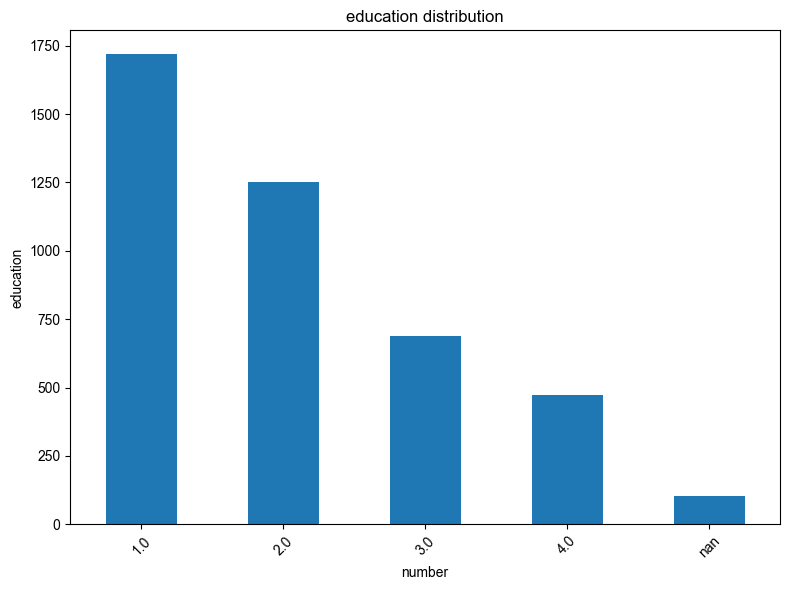

In [34]:
value_counts_education = df['education'].value_counts(dropna=False)
plt.figure(figsize=(8, 6))
value_counts_education.plot(kind='bar')
plt.ylabel('education')
plt.xlabel('number')
plt.xticks(rotation=45)
plt.title('education distribution')
plt.tight_layout()
plt.show()

We handle missing values in the 'education' column by 'filling with the mode of each age group.'

 The main reasons are as follows:
 
  on one hand, directly deleting samples with missing values can lead to loss of valuable data, reduce the sample size, potentially change the distribution characteristics of the original data, and thus affect the accuracy of subsequent analyses. 
  
  Additionally, most statistical tools cannot directly process data with missing values, so filling in missing values is essential for ensuring data completeness and meeting analytical needs. On the other hand, missing values may contain latent information such as 'differences in response habits among different age groups.' Filling them with a global value would ignore the intrinsic association between age and educational level (for example, people from different generations have had different educational opportunities; the mainstream educational level of the 30–40 age group may differ significantly from that of the 60–70 age group). Processing by age group more closely aligns with the actual data patterns.

Processing 'education' column: 105 missing values in total
Missing value ratio: 2.48%

Education mode for each age group:
30-35: 2.0
35-40: 2.0
40-45: 2.0
45-50: 1.0
50-55: 1.0
55-60: 1.0
60-65: 1.0
65-70: 1.0

Processed data saved successfully as 'framingham_filled.csv'


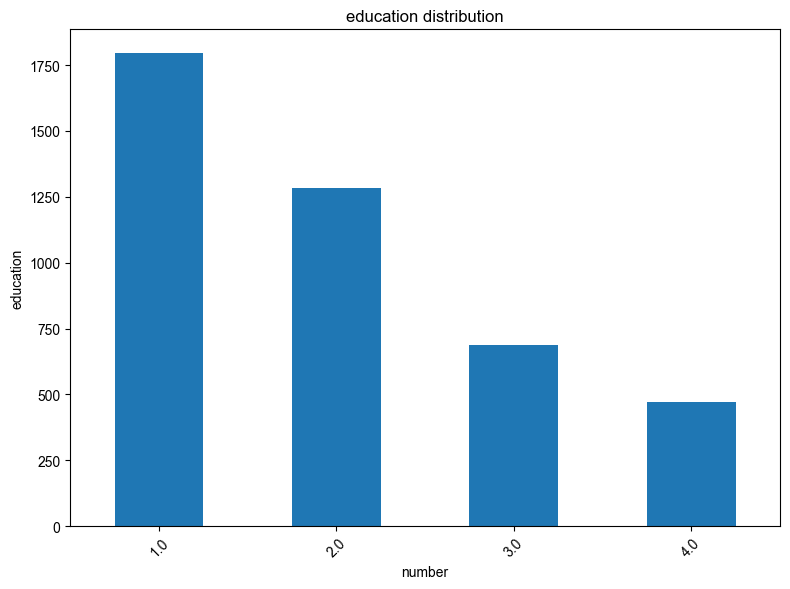

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. divide age into groups of 5 years
bins = range(30, 71, 5)  # 30-35,35-40,...,65-70
labels = [f'{i}-{i+5}' for i in bins[:-1]]
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# 2. count missing values in education column and print
missing_education = df['education'].isnull().sum()
total = len(df)
missing_ratio = (missing_education / total) * 100  # calculate percentage
print(f"Processing 'education' column: {missing_education} missing values in total")
print(f"Missing value ratio: {missing_ratio:.2f}%")  # print ratio with 2 decimal places

# 3. calculate education mode for each age group and print
group_mode_education = df.groupby('age_group')['education'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
print("\nEducation mode for each age group:")
for age_group, mode in group_mode_education.items():
    print(f"{age_group}: {mode}")

# 4. fill missing values in education column by age group mode
def fill_by_group_mode(row):
    if pd.isnull(row['education']):
        # fill missing values with mode of the age group
        return group_mode_education.get(row['age_group'])
    return row['education']

# Apply the filling logic
df['education'] = df.apply(fill_by_group_mode, axis=1)
# Convert to category type
df['education'] = df['education'].astype('category')

# 5. save processed data
df.to_csv('framingham_filled.csv', index=False)
print("\nProcessed data saved successfully as 'framingham_filled.csv'")

# 6. plot education distribution chart
value_counts_education = df['education'].value_counts(dropna=False)
plt.figure(figsize=(8, 6))
value_counts_education.plot(kind='bar')
plt.ylabel('education')
plt.xlabel('number')
plt.xticks(rotation=45)
plt.title('education distribution')
plt.tight_layout()
plt.show()

## Current smoker or not

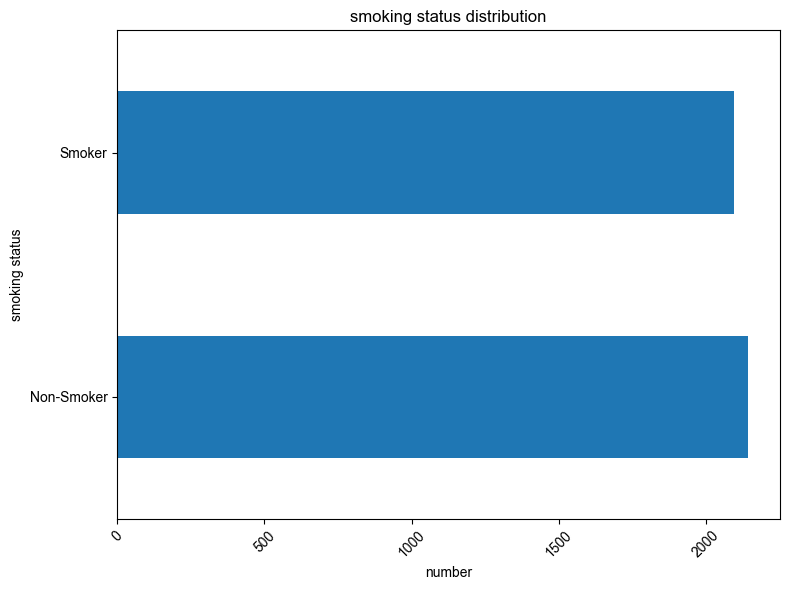

In [36]:
# Replace 0 in the male column with female, and 1 with male
df['currentSmoker'] = df['currentSmoker'].map({0: 'Non-Smoker', 1:'Smoker'})

# Plot the number distribution of the male column
value_counts_male = df['currentSmoker'].value_counts()
plt.figure(figsize=(8, 6))
value_counts_male.plot(kind='barh')
plt.ylabel('smoking status')
plt.xlabel('number')
plt.xticks(rotation=45)
plt.title('smoking status distribution')
plt.tight_layout()
plt.show()

# The distribution corresponds to the expected.
# No anomalies detected

## CigsPerDay

Proportion of missing values in the cigsPerDay column to the total data: 0.04%


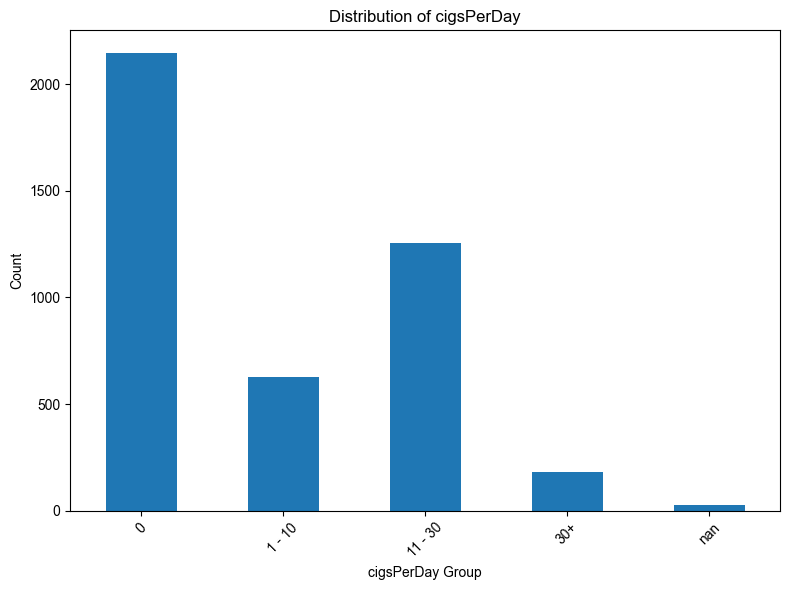

In [37]:
# Calculate the number of missing values in the cigsPerDay column
missing_cigs = df['cigsPerDay'].isnull().sum()
# Calculate the total number of data in the dataset
total_data = df.size
# Calculate the proportion of missing values in the cigsPerDay column to the total data
missing_percentage = (missing_cigs / total_data) * 100
print(f'Proportion of missing values in the cigsPerDay column to the total data: {missing_percentage:.2f}%')
# Group the cigsPerDay column
bins = [0, 1, 11, 31, float('inf')]
labels = ['0', '1 - 10', '11 - 30', '30+']
df['cigsPerDay_group'] = pd.cut(df['cigsPerDay'], bins=bins, labels=labels, right=False)
# Count the values after grouping
value_counts_cigs = df['cigsPerDay_group'].value_counts(dropna=False)
value_counts_cigs = value_counts_cigs.reindex(labels + [float('nan')])
plt.figure(figsize=(8, 6))
value_counts_cigs.plot(kind='bar')
plt.xlabel('cigsPerDay Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Distribution of cigsPerDay')
plt.tight_layout()
plt.show()

We noticed that the cigsPerDay column has a small number of missing values. First, we distinguish between smokers and non-smokers using the currentSmoker column to create masks. Next, we count the number of missing values for each group, calculate the median of cigsPerDay for smokers, and assume a smoking amount of 0 for non-smokers based on common sense. Finally, we fill the missing values with the median for smokers and 0 for non-smokers, ensuring the data is complete and reasonable.

Processing the 'cigsPerDay' column: a total of 29 missing values were filled in (29 among smokers, 0 among non-smokers)
Processed data saved successfully as 'framingham_filled.csv'


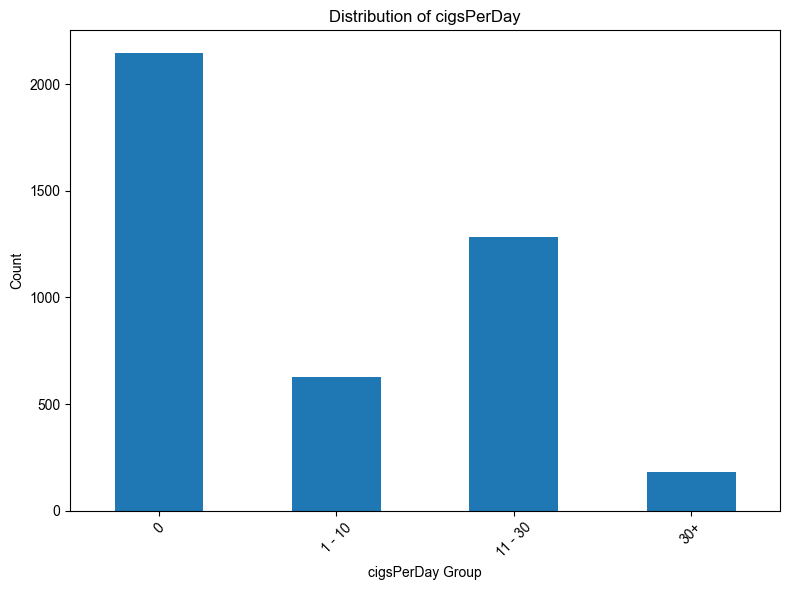

In [38]:
df = pd.read_csv('framingham.csv')
# Distinguish smokers and non-smokers
smoker_mask = df['currentSmoker'] == 1  # Smoker mask
non_smoker_mask = df['currentSmoker'] == 0  # Non-smoker mask

# Count the missing values separately for smokers and non-smokers
missing_cigs_smoker = df.loc[smoker_mask, 'cigsPerDay'].isnull().sum()
missing_cigs_non_smoker = df.loc[non_smoker_mask, 'cigsPerDay'].isnull().sum()
total_missing_cigs = missing_cigs_smoker + missing_cigs_non_smoker

# Calculate the median daily cigarette consumption for smokers (more resistant to outliers)
median_cigs = df.loc[smoker_mask, 'cigsPerDay'].median()

# Fill missing values with median for smokers, and 0 for non-smokers (reasonable assumption that non-smokers have 0 cigarette consumption)
df.loc[smoker_mask, 'cigsPerDay'] = df.loc[smoker_mask, 'cigsPerDay'].fillna(median_cigs)
df.loc[non_smoker_mask, 'cigsPerDay'] = df.loc[non_smoker_mask, 'cigsPerDay'].fillna(0)

print(f"Processing the 'cigsPerDay' column: a total of {total_missing_cigs} missing values were filled in ({missing_cigs_smoker} among smokers, {missing_cigs_non_smoker} among non-smokers)")

missing_education = df['education'].isnull().sum()
mode_education = df['education'].mode()[0]
df['education'] = df['education'].fillna(mode_education).astype('category')

df.to_csv('framingham_filled.csv', index=False)
print("Processed data saved successfully as 'framingham_filled.csv'")

# show the result after fill
bins = [0, 1, 11, 31, float('inf')]
labels = ['0', '1 - 10', '11 - 30', '30+']
df['cigsPerDay_group'] = pd.cut(df['cigsPerDay'], bins=bins, labels=labels, right=False)

# Count the values after grouping
value_counts_cigs = df['cigsPerDay_group'].value_counts(dropna=False)
value_counts_cigs = value_counts_cigs.reindex(labels)

# Plot a bar chart
plt.figure(figsize=(8, 6))
value_counts_cigs.plot(kind='bar')
plt.xlabel('cigsPerDay Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Distribution of cigsPerDay')
plt.tight_layout()
plt.show()

## BPMeds


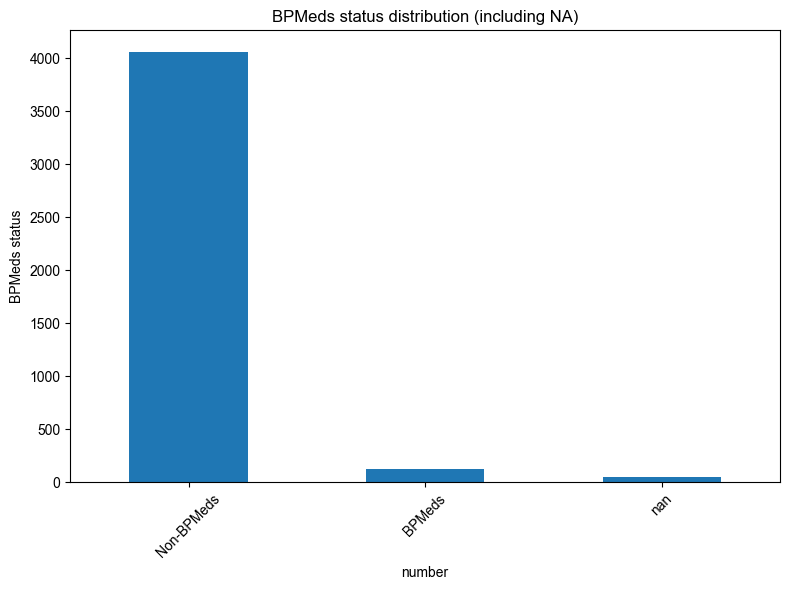

In [39]:
# Count the quantity of each value of BPMeds (including missing values)
value_counts_BPMeds = df['BPMeds'].value_counts(dropna=False)

# Replace 0 with Non-BPMeds and 1 with BPMeds
df['BPMeds'] = df['BPMeds'].map({0: 'Non-BPMeds', 1: 'BPMeds'})

# Plot the number distribution of the BPMeds column (including missing values)
value_counts_BPMeds_after = df['BPMeds'].value_counts(dropna=False)  
plt.figure(figsize=(8, 6))
value_counts_BPMeds_after.plot(kind='bar')  
plt.ylabel('BPMeds status')
plt.xlabel('number')
plt.xticks(rotation=45)
plt.title('BPMeds status distribution (including NA)')
plt.tight_layout()
plt.show()

In [ ]:
total = len(df)
missing_bpmeds = df['BPMeds'].isnull().sum()
missing_ratio = missing_bpmeds / total * 100  
print(f"The number of missing values in the BPMeds column: {missing_bpmeds}")
print(f"The proportion of missing values in the BPMeds column to the total: {missing_ratio:.2f}%")

The number of missing values in the BPMeds column: 53
The proportion of missing values in the BPMeds column to the total: 1.25%


For these missing values, we chose to delete the entire row of data because the number of missing values is relatively small, and therefore they are considered to have little impact on the results.

Processing the 'BPMeds' column: dropped 53 rows with missing values
Processed data saved successfully as 'framingham_filled.csv'


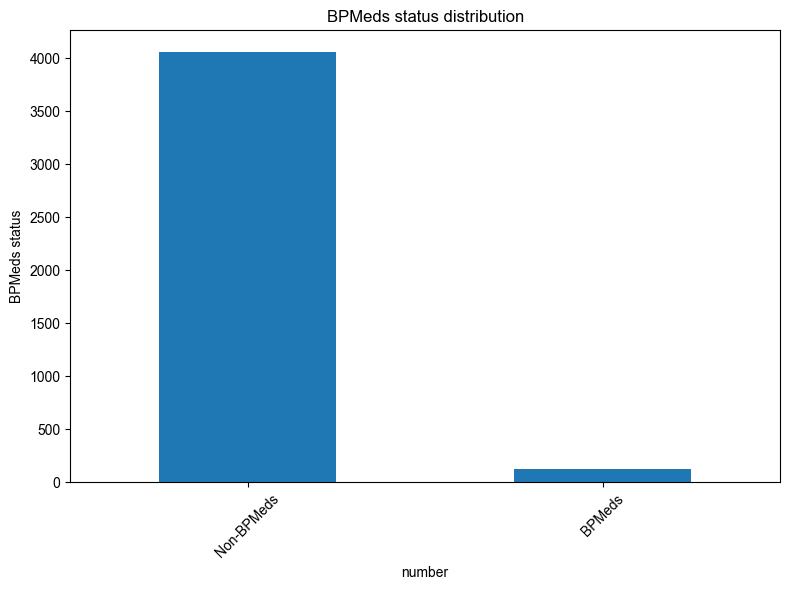

In [41]:
# Count the missing values in the 'BPMeds' column
missing_bpmeds = df['BPMeds'].isnull().sum()

# Drop rows where 'BPMeds' is NA
df = df.dropna(subset=['BPMeds'])

print(f"Processing the 'BPMeds' column: dropped {missing_bpmeds} rows with missing values")

df.to_csv('framingham_filled.csv', index=False)
print("Processed data saved successfully as 'framingham_filled.csv'")

# show result after fill
value_counts_BPMeds = df['BPMeds'].value_counts()
plt.figure(figsize=(8, 6))
value_counts_BPMeds.plot(kind='bar')
plt.ylabel('BPMeds status')
plt.xlabel('number')
plt.xticks(rotation=45)
plt.title('BPMeds status distribution')
plt.tight_layout()
plt.show()

## Prevalent Stroke, prevalentHyp, and diabetes

In [42]:
variables = ['prevalentStroke', 'prevalentHyp', 'diabetes']
result_list = []

for var in variables:
    # calculate counts
    count_df = df[var].value_counts().reset_index()
    count_df.columns = ['Category', 'Count']
    
    # calculate percentage
    total = count_df['Count'].sum()
    count_df['Percentage (%)'] = (count_df['Count'] / total * 100).round(1)
        
    count_df.insert(0, 'Variable', var)

    # map category values to 'No' and 'Yes'
    count_df['Category'] = count_df['Category'].map({0: 'No', 1: 'Yes'})
    result_list.append(count_df)

# concatenate all results into a single DataFrame
freq_table = pd.concat(result_list, ignore_index=True)

# show the frequency table
print(freq_table)

          Variable Category  Count  Percentage (%)
0  prevalentStroke       No   4161            99.4
1  prevalentStroke      Yes     24             0.6
2     prevalentHyp       No   2891            69.1
3     prevalentHyp      Yes   1294            30.9
4         diabetes       No   4078            97.4
5         diabetes      Yes    107             2.6


##  TotChol

We found some missing values and used the median to fill them.

In [43]:
# Count the missing values in the 'totChol' column
missing_totChol = df['totChol'].isnull().sum()

# Calculate the median of total cholesterol (resistant to outliers)
median_totChol = df['totChol'].median()
# Fill missing values with the median
df['totChol'] = df['totChol'].fillna(median_totChol)

print(f"Processing the 'totChol' column: filled {missing_totChol} missing values")

df.to_csv('framingham_filled.csv', index=False)
print("Processed data saved successfully as 'framingham_filled.csv'")

Processing the 'totChol' column: filled 49 missing values
Processed data saved successfully as 'framingham_filled.csv'


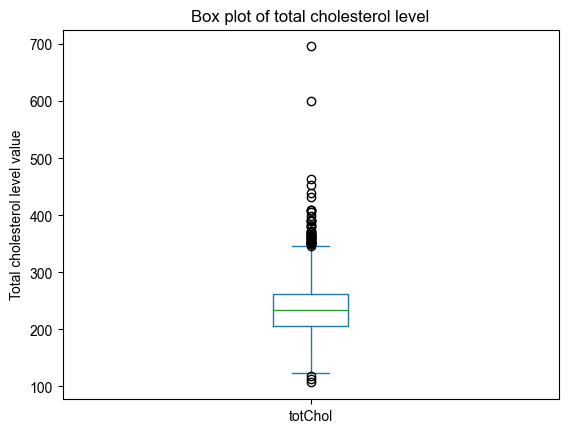

In [44]:
df['totChol'].plot.box()
plt.title('Box plot of total cholesterol level')
plt.ylabel('Total cholesterol level value')
plt.show()

## sysBP and diaBP

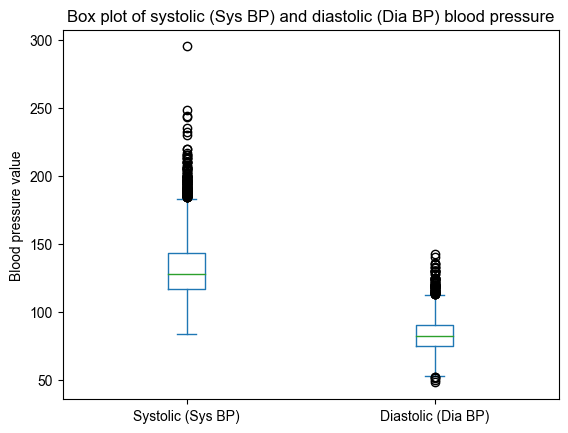

In [45]:
# plot the box plot for sysBP and diaBP
columns_to_plot = ['sysBP', 'diaBP']
data_to_plot = df[columns_to_plot]

# plot the box plot
ax = data_to_plot.plot.box()

# set the title and labels
plt.title('Box plot of systolic (Sys BP) and diastolic (Dia BP) blood pressure')
plt.ylabel('Blood pressure value')

# set the x-axis tick labels
ax.set_xticklabels(['Systolic (Sys BP)', 'Diastolic (Dia BP)'])

# show the plot
plt.show()

# The distribution corresponds to the expected.
# No anomalies detected

## BMI

In [46]:
# Count the missing values in the 'BMI' column
missing_BMI = df['BMI'].isnull().sum()

# Calculate the median of BMI
median_BMI = df['BMI'].median()
# Fill missing values with the median
df['BMI'] = df['BMI'].fillna(median_BMI)

print(f"Processing the 'BMI' column: filled {missing_BMI} missing values")

df.to_csv('framingham_filled.csv', index=False)
print("Processed data saved successfully as 'framingham_filled.csv'")

Processing the 'BMI' column: filled 19 missing values
Processed data saved successfully as 'framingham_filled.csv'


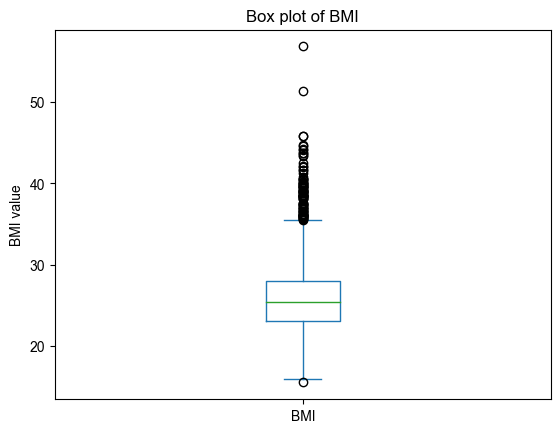

In [47]:
df['BMI'].plot.box()
plt.title('Box plot of BMI')
plt.ylabel('BMI value')
plt.show()

## HeartRate

In [48]:
# Count the missing values in the 'heartRate' column
missing_heartRate = df['heartRate'].isnull().sum()

# Calculate the median of heart rate
median_heartRate = df['heartRate'].median()
# Fill missing values with the median
df['heartRate'] = df['heartRate'].fillna(median_heartRate)

print(f"Processing the 'heartRate' column: filled {missing_heartRate} missing values")

df.to_csv('framingham_filled.csv', index=False)
print("Processed data saved successfully as 'framingham_filled.csv'")

Processing the 'heartRate' column: filled 1 missing values
Processed data saved successfully as 'framingham_filled.csv'


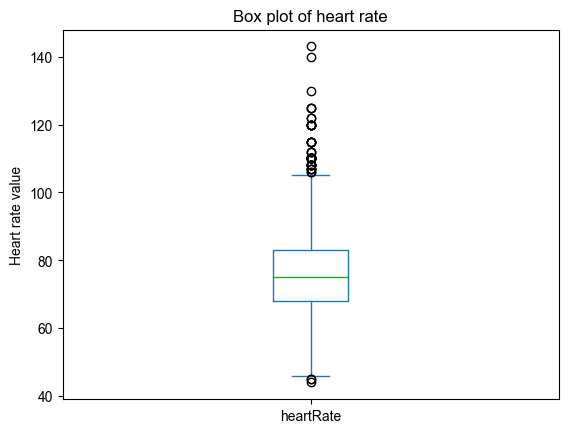

In [49]:
df['heartRate'].plot.box()
plt.title('Box plot of heart rate')
plt.ylabel('Heart rate value')
plt.show()

## Glucose

In [50]:
# Count the missing values in the 'glucose' column
missing_glucose = df['glucose'].isnull().sum()

# Calculate the median of glucose
median_glucose = df['glucose'].median()
# Fill missing values with the median
df['glucose'] = df['glucose'].fillna(median_glucose)

print(f"Processing the 'glucose' column: filled {missing_glucose} missing values")

df.to_csv('framingham_filled.csv', index=False)
print("Processed data saved successfully as 'framingham_filled.csv'")

Processing the 'glucose' column: filled 386 missing values
Processed data saved successfully as 'framingham_filled.csv'


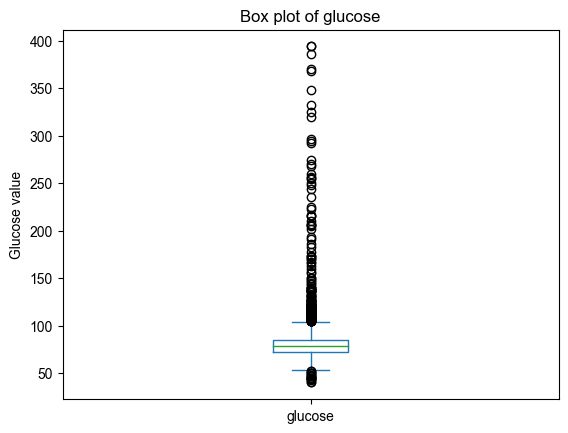

In [51]:
df['glucose'].plot.box()
plt.title('Box plot of glucose')
plt.ylabel('Glucose value')
plt.show()

## TenYearCHD

TenYearCHD table：
   TenYearCHD  number
0           0    3552
1           1     633


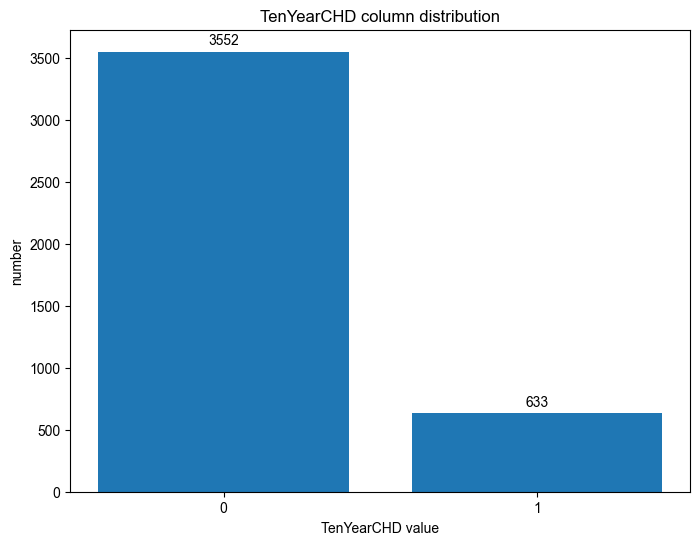

In [52]:
# Count the different values in the TenYearCHD column
value_counts = df['TenYearCHD'].value_counts().reset_index(name='number')

# output the statistics table
print('TenYearCHD table：')
print(value_counts)

# draw the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(value_counts['TenYearCHD'].astype(str), value_counts['number'])
plt.xlabel('TenYearCHD value')
plt.ylabel('number')
plt.title('TenYearCHD column distribution')

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.show()

## Check whether the missing values have been completely filled

In [53]:
df_filled = pd.read_csv('framingham_filled.csv')
missing_values = df_filled.isnull().sum()
print("\nthe missing values in each column:")
print(missing_values)


the missing values in each column:
male                0
age                 0
education           0
currentSmoker       0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
cigsPerDay_group    0
dtype: int64


## Outlier processing

After careful examination, we did not find any obvious outliers.

# Exploratory analysis and visualization

## The relationship between the age and the total cholesterol level

The Pearson correlation coefficient between age and total cholesterol level: 0.2579383828459122, p value: 1.3834834207082795e-64


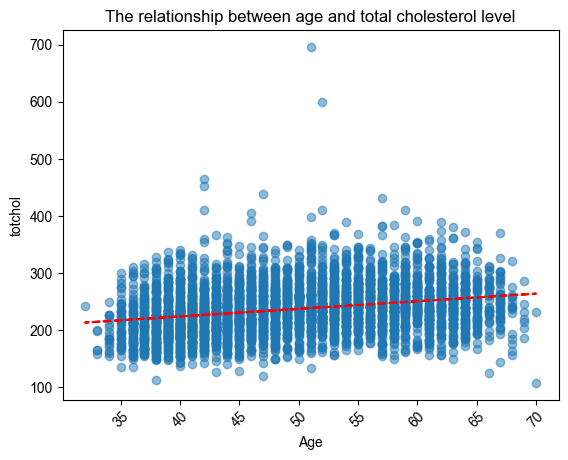

In [54]:
# Calculate the Pearson correlation coefficient and p-value between age and total cholesterol level.
corr, p_value = stats.pearsonr(df['age'], df['totChol'])

print(f'The Pearson correlation coefficient between age and total cholesterol level: {corr}, p value: {p_value}')

# Draw a scatter plot and add a trend line
plt.scatter(df['age'], df['totChol'], alpha=0.5)
plt.title('The relationship between age and total cholesterol level')
plt.xlabel('Age')
plt.xticks(rotation=45)
plt.ylabel('totchol')

# trend line
z = np.polyfit(df['age'], df['totChol'], 1)
p = np.poly1d(z)
plt.plot(df['age'], p(df['age']), "r--")
plt.show()

Conclusion: From the result of output we can know, there is a positive relationship between age and total cholesterol levels. That is, as age increases, the total cholesterol levels tend to rise.Besides,The p-value is much smaller than the commonly used significance level (such as 0.05), which indicates that we have strong evidence to reject the null hypothesis (the null hypothesis usually assumes no correlation between the two variables), and thus we can conclude that the correlation between age and total cholesterol level is significant.

## The relationship between smoke and TenYearCHD

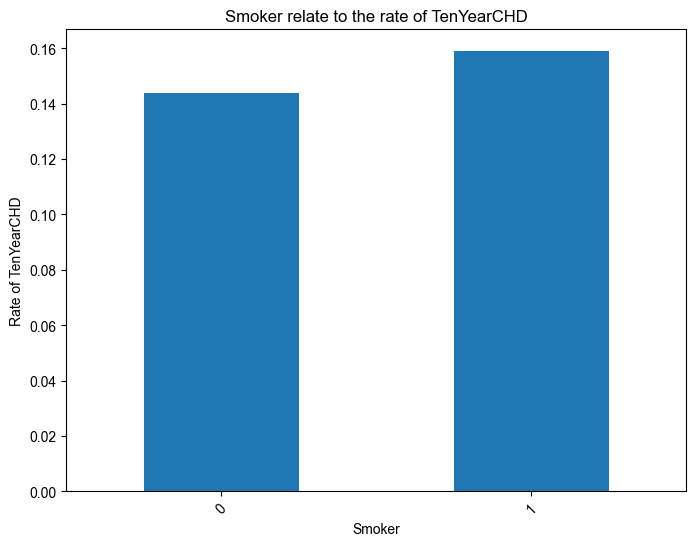

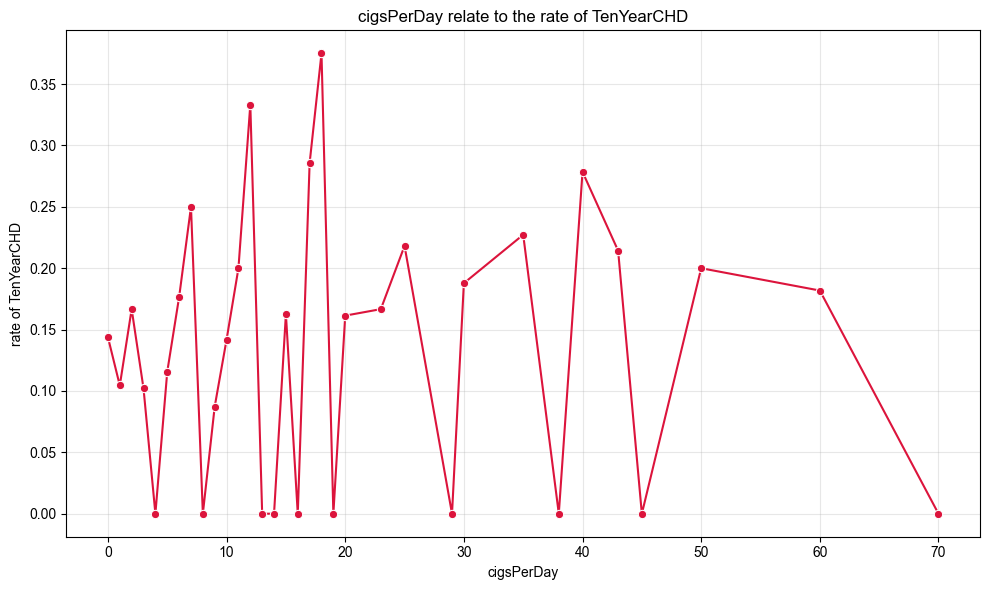

In [55]:

smoker_chd = df_filled.groupby('currentSmoker')['TenYearCHD'].mean()

plt.figure(figsize=(8, 6))
smoker_chd.plot(kind='bar')
plt.title('Smoker relate to the rate of TenYearCHD')
plt.xlabel('Smoker')
plt.xticks(rotation=45)
plt.ylabel('Rate of TenYearCHD')
plt.show()

cigs_chd_prob = df_filled.groupby('cigsPerDay')['TenYearCHD'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='cigsPerDay', y='TenYearCHD', data=cigs_chd_prob, marker='o', color='crimson')

plt.title('cigsPerDay relate to the rate of TenYearCHD')
plt.xlabel('cigsPerDay')
plt.ylabel('rate of TenYearCHD')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


Conclusion:The probability of developing coronary heart disease within ten years for smokers (Smoker = 1) is significantly higher than that for non-smokers (Smoker = 0). This indicates that smoking behavior significantly increases the risk of developing coronary heart disease in the next ten years. The data on the relationship between daily smoking quantity and the risk of coronary heart disease over ten years fluctuates too much to draw a conclusion of correlation.

## The relationship between BMI and underlying diseases

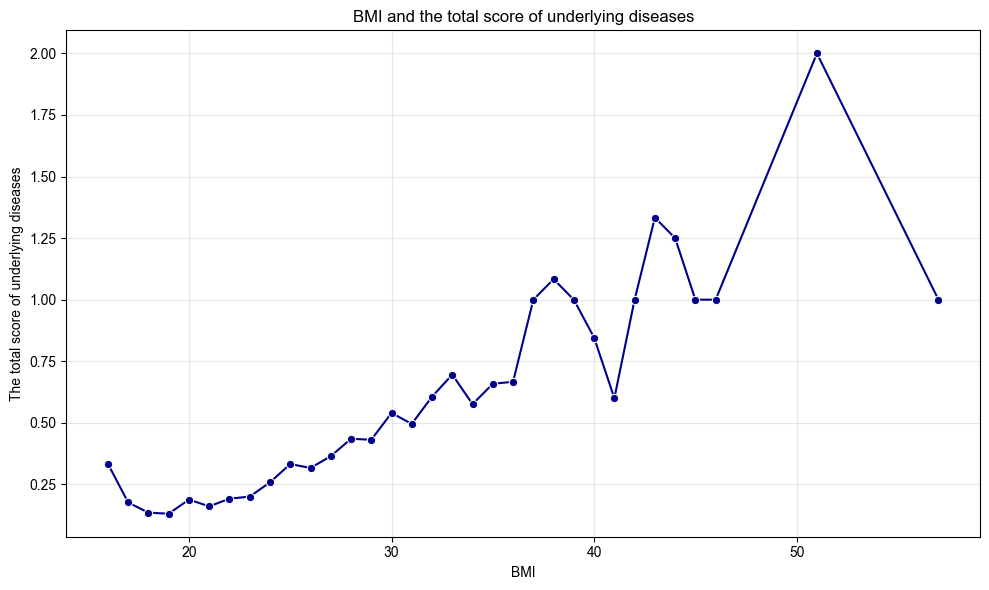

In [56]:

df_filled['comorbidities'] = df_filled['prevalentStroke'] + df_filled['prevalentHyp'] + df_filled['diabetes']

bmi_comorbid = df_filled.groupby(df_filled['BMI'].round().astype(int))['comorbidities'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(x='BMI', y='comorbidities', data=bmi_comorbid, marker='o', color='darkblue')


plt.title('BMI and the total score of underlying diseases')
plt.xlabel('BMI')
plt.ylabel('The total score of underlying diseases')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

Conclusion:As BMI increases, the total score of underlying diseases (accumulated by prevalentStroke, prevalentHyp, and diabetes) generally shows an upward trend. This indicates that the higher the BMI, the greater the probability of concurrently suffering from stroke, hypertension, and diabetes, that is, obesity is positively correlated with the concurrent risk of multiple underlying diseases.

## The relationship between glucose and CHD rate

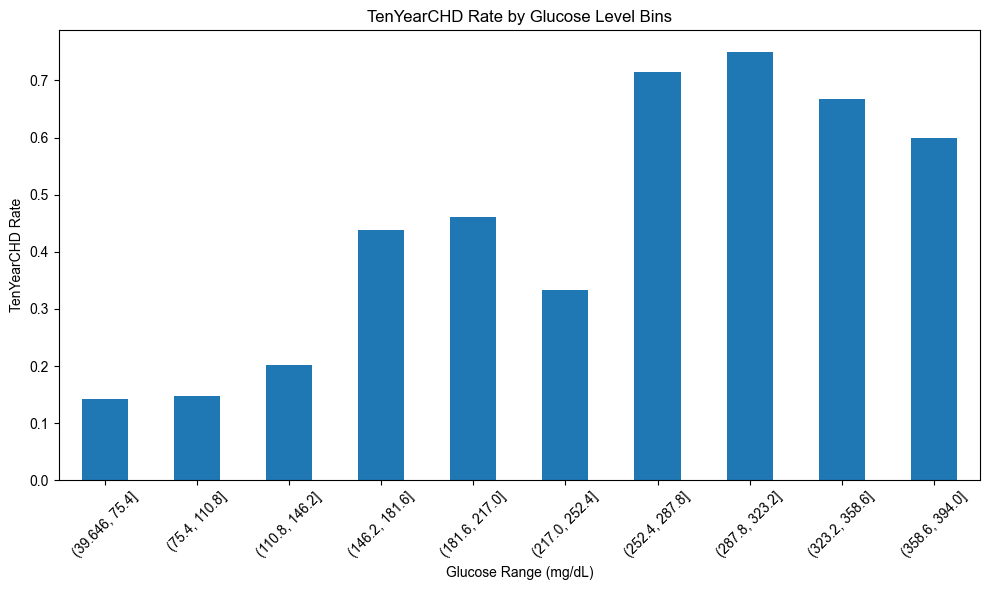

TenYearCHD rate by glucose bins:
(39.646, 75.4]: 0.142
(75.4, 110.8]: 0.147
(110.8, 146.2]: 0.202
(146.2, 181.6]: 0.438
(181.6, 217.0]: 0.462
(217.0, 252.4]: 0.333
(252.4, 287.8]: 0.714
(287.8, 323.2]: 0.750
(323.2, 358.6]: 0.667
(358.6, 394.0]: 0.600


In [57]:
df_filled['glucose_bin'] = pd.cut(df_filled['glucose'], bins=10)
chd_rate_by_glucose = df_filled.groupby('glucose_bin')['TenYearCHD'].mean()


plt.figure(figsize=(10, 6))
chd_rate_by_glucose.plot(kind='bar')
plt.title('TenYearCHD Rate by Glucose Level Bins')
plt.xlabel('Glucose Range (mg/dL)')
plt.ylabel('TenYearCHD Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


print("TenYearCHD rate by glucose bins:")
for bin_range, rate in chd_rate_by_glucose.items():
    print(f"{bin_range}: {rate:.3f}")

Conclusion:The higher the blood sugar level, the greater the risk of coronary heart disease in the next 10 years. The risk does not increase only after reaching the diagnostic criteria for diabetes. It has been continuously rising since the "high normal" or "prediabetes" stage.

## The relationship between BP and CHD rate

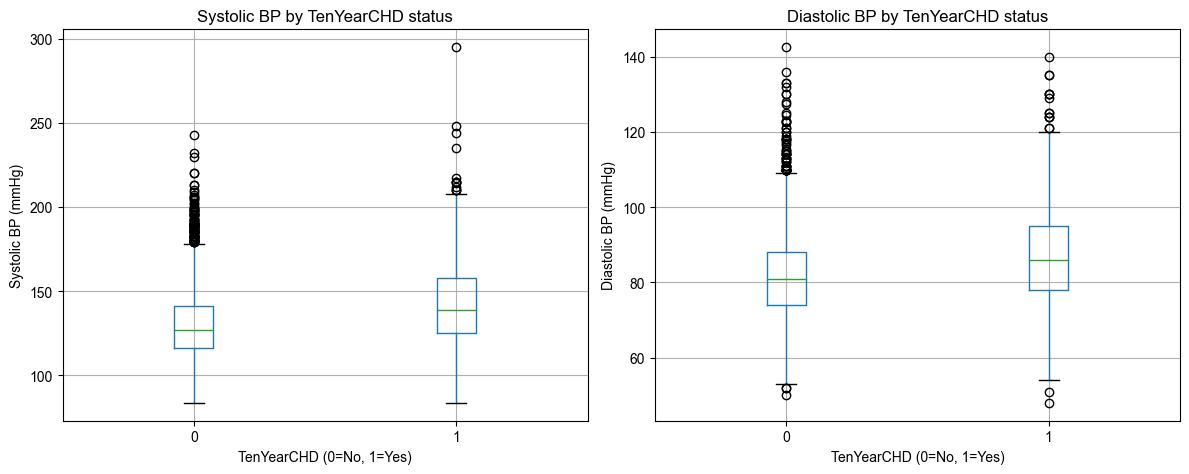

Blood Pressure by TenYearCHD Status:
Systolic BP - No CHD: 130.28 mmHg
Systolic BP - CHD: 143.55 mmHg
Diastolic BP - No CHD: 82.15 mmHg
Diastolic BP - CHD: 87.03 mmHg


In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Systolic BP
df_filled.boxplot(column='sysBP', by='TenYearCHD', ax=ax1)
ax1.set_title('Systolic BP by TenYearCHD status')
ax1.set_xlabel('TenYearCHD (0=No, 1=Yes)')
ax1.set_ylabel('Systolic BP (mmHg)')

# Diastolic BP
df_filled.boxplot(column='diaBP', by='TenYearCHD', ax=ax2)
ax2.set_title('Diastolic BP by TenYearCHD status')
ax2.set_xlabel('TenYearCHD (0=No, 1=Yes)')
ax2.set_ylabel('Diastolic BP (mmHg)')

plt.suptitle('')  
plt.tight_layout()
plt.show()

print("Blood Pressure by TenYearCHD Status:")
print(f"Systolic BP - No CHD: {df_filled[df_filled['TenYearCHD'] == 0]['sysBP'].mean():.2f} mmHg")
print(f"Systolic BP - CHD: {df_filled[df_filled['TenYearCHD'] == 1]['sysBP'].mean():.2f} mmHg")
print(f"Diastolic BP - No CHD: {df_filled[df_filled['TenYearCHD'] == 0]['diaBP'].mean():.2f} mmHg")
print(f"Diastolic BP - CHD: {df_filled[df_filled['TenYearCHD'] == 1]['diaBP'].mean():.2f} mmHg")

Conclusion: Blood pressure is significantly associated with the risk of coronary heart disease: both systolic and diastolic blood pressure are higher and show greater variability in the group at risk of coronary heart disease

# General conclusion and recommendations

As part of this study, a dataset from the Framingham Heart Study was analyzed to assess the impact of demographic, behavioral, and physiological factors on an individual’s likelihood of developing coronary heart disease (CHD) within the next ten years.

The main stages of the work included:
Importing data from a CSV file into a DataFrame.
Preliminary review and data cleaning: Standardizing variable formats and correcting inconsistent entries.Removing duplicate or invalid records.Handling missing values through imputation using median values or other suitable statistical methods.Verifying data consistency and plausibility based on medical knowledge and related variables.
Conducting analytical research: Assessing the relationship between age and CHD risk.Exploring gender differences in CHD incidence.Investigating the influence of smoking status on CHD risk.Evaluating the relationship between blood pressure, cholesterol levels, and CHD probability.Examining how BMI and glucose levels contribute to CHD development.Identifying the combined effect of comorbidities such as diabetes, hypertension, and stroke history on CHD likelihood.

The main conclusions:

Age is one of the strongest predictors of CHD risk. The probability of developing CHD increases steadily with age, especially among men.
Gender shows a significant difference — males have a higher risk of CHD than females, possibly due to both lifestyle and physiological factors.
Smoking has a substantial adverse impact on cardiovascular health. Smokers exhibit nearly double the 10-year CHD incidence compared to non-smokers.
Blood pressure is significantly associated with CHD risk. Both systolic and diastolic pressures are higher in individuals who developed CHD (mean systolic ≈ 143.6 mmHg vs. 130.3 mmHg for non-CHD).
Cholesterol level demonstrates a positive correlation with CHD risk. Elevated total cholesterol is a major predictor of future heart disease.
Body Mass Index (BMI) is positively related to the coexistence of multiple chronic conditions (e.g., diabetes, hypertension, stroke), highlighting obesity as a key risk amplifier.
Blood glucose levels show a continuous relationship with CHD risk — the probability of CHD increases even from the “high-normal” or “prediabetic” range, and exceeds 40% when glucose surpasses 180 mg/dL.
Comorbidities such as diabetes, hypertension, and prior stroke substantially increase CHD risk, reinforcing their importance in preventive screening.

Overall conclusion:

The occurrence of coronary heart disease is driven by a combination of demographic, lifestyle, and metabolic factors. Among them, age, smoking, high blood pressure, high glucose, and high cholesterol are the most significant risk contributors.
Through early lifestyle interventions, smoking cessation, routine health monitoring, and personalized medical management, both individuals and healthcare providers can effectively reduce the ten-year risk of CHD and enhance long-term cardiovascular health outcomes.

Recommendations:

Early prevention and health monitoring:
Intervene early for individuals whose blood pressure, glucose, or cholesterol are within the high-normal range. Preventive lifestyle management should start before disease onset.
Comprehensive smoking cessation programs:
Since smoking is among the most influential modifiable risk factors, large-scale public health efforts to reduce smoking rates are critical for lowering CHD incidence.
Promote weight management and physical activity:
Encourage regular aerobic exercise and balanced nutrition to control BMI, thus reducing the risk of multi-disease comorbidity and subsequent CHD.
Regular cardiovascular screening:
Implement annual checks of blood pressure, fasting glucose, and cholesterol, especially for middle-aged and older adults, to enable early detection and risk stratification.
Personalized healthcare strategies:
Use predictive models based on these findings to classify individuals by risk level and tailor prevention, treatment, and monitoring plans accordingly.
Healthcare system application:
Medical institutions can integrate CHD risk prediction models into their clinical decision systems to improve resource allocation and guide targeted prevention strategies.